<a href="https://colab.research.google.com/github/ajdduck/uos_linearrgression/blob/master/HW_3_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.stats.api as sms

In [0]:
df = pd.read_csv('/content/drive/My Drive/plastic_hardeness.txt', names=['Y','X'])

In [3]:
df

,Y,X
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0
5,220.0,24.0
6,215.0,24.0
7,223.0,24.0
8,237.0,32.0
9,234.0,32.0


In [0]:
y = df['Y']
X = df['X']
results = smf.ols('y ~ X', data = df).fit()

In [0]:
results_fitted_value = results.fittedvalues
results_residual = results.resid

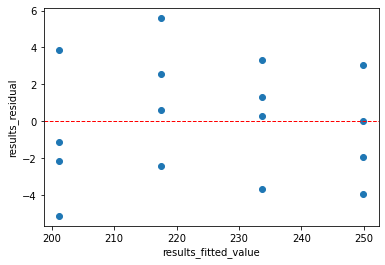

In [6]:
# Part(b)
# There is no depatures from linear regression model.
plt.scatter(results_fitted_value, results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel('results_fitted_value')
plt.ylabel('results_residual')
plt.show()

In [12]:
## Brown-Forsythe Test
df_24_low = df.copy()
df_24_low = df_24_low[df_24_low['X']<=24]
df_24_low

,Y,X
0,199.0,16.0
1,205.0,16.0
2,196.0,16.0
3,200.0,16.0
4,218.0,24.0
5,220.0,24.0
6,215.0,24.0
7,223.0,24.0


In [13]:
df_24_high = df.copy()
df_24_high = df_24_high[df_24_high['X']>24]
df_24_high

,Y,X
8,237.0,32.0
9,234.0,32.0
10,235.0,32.0
11,230.0,32.0
12,250.0,40.0
13,248.0,40.0
14,253.0,40.0
15,246.0,40.0


In [17]:
y_24_low = df_24_low['Y'] 
x_24_low = df_24_low['X']

results_24_low = smf.ols('y_24_low ~ x_24_low', data = df_24_low).fit()

df_24_low['e'] = results_24_low.resid
df_24_low.head()

,Y,X,e
0,199.0,16.0,-1.000000e+00
1,205.0,16.0,5.000000e+00
2,196.0,16.0,-4.000000e+00
3,200.0,16.0,1.705303e-13
4,218.0,24.0,-1.000000e+00


In [18]:
y_24_high = df_24_high['Y'] 
x_24_high = df_24_high['X']

results_24_high = smf.ols('y_24_high ~ x_24_high', data = df_24_high).fit()

df_24_high['e'] = results_24_high.resid
df_24_high.head()

,Y,X,e
8,237.0,32.0,3.00
9,234.0,32.0,0.00
10,235.0,32.0,1.00
11,230.0,32.0,-4.00
12,250.0,40.0,0.75


In [0]:
median_high = df_24_high['e'].median()
median_low = df_24_low['e'].median()

In [0]:
d_ihigh = abs(df_24_high['e'] - median_high)
d_ilow = abs(df_24_low['e'] - median_low)

In [33]:
# Part(e)
# ttest_statistic's absolute value(0.4148869093391398) <= t_critical_value(1.7613101357748562)
# conclude the error variance is constant.
# vice versa. the error variance is not constant.

# In part(b), there is no departures from regression model. 
# part(e)'result suuports part(b)'s result

ttest_result = scipy.stats.ttest_ind(d_ihigh, d_ilow, equal_var = True)
ttest_result

Ttest_indResult(statistic=-0.4148869093391398, pvalue=0.6845123995963873)

In [30]:
t_critical_value = scipy.stats.t.ppf(q=1-0.05, df = 14)
t_critical_value

1.7613101357748562